<b>To analyze confidence interval for difference between two population proportioan and their means</b>

Here we will use NHANES 2015-2016 data for our study. We will study difference of population proportion b/w female and male smokers.
SMQ020 is column for smoker and non-smoker categorization.

For population means, we will stuyd difference of mean of BMI (body mass index) within our male and female populations. column for our reference for this particular study is BMXBMI
And gender specific column is RIAGENDER

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df=pd.read_csv("nhanes_2015_2016.csv")

df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


<b> Data mining and data cleansing </b>

If we see in above SMQ020 column 1 refer to yes and 2 refer to no, similarly in RIAGENDER column 1 refer to male and 2 refer to female, so we will use following code to replace them with desired string values. Also 7 and 9 refers to null value (missing data)

In [4]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
df["SMQ020x"] = df.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
df["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [5]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
df["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

Following we are using cross tab function of panda to show proportion of smoking and non smoking male & female to give better data analysis

In [6]:
dx = df[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


Following we are replacing back after high level analysis from yes & no to 1 and 0

In [7]:
# Recode SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})

In [8]:
dz = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dz.columns = ["Proportion", "Total n"]
dz

,Proportion,Total n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


<b>Constructing confidence interval</b>
As above we have population proportion for male & female smokers, now we can being to cacluate confidence intervals. Equation to calculate confidence interval is as:
                            Best Estimate±Margin of Error
                            
Where the Best Estimate is the observed population proportion or mean from the sample and the Margin of Error is the t-multiplier.

The equation to create a 95% confidence interval can also be shown as:

Population Proportion or Mean ±(t−multiplier∗ Standard Error)

standar error is calculate for population proportion and means as follows:
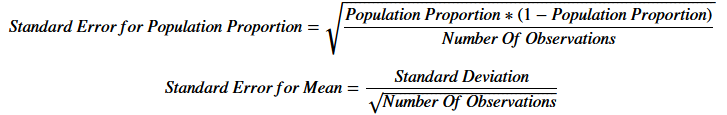

and standard error for difference of population proportiona and mean is cacluated as:

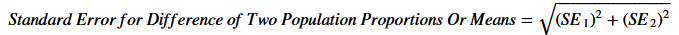

<b> Difference of two population proportions</b>

In [9]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [10]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [11]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

<b>difference of two population means</b>

In [12]:
df["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [13]:
df.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [14]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [15]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [16]:
d = 29.939946 - 28.778072

In [17]:
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)